<a href="https://colab.research.google.com/github/harene634/REP/blob/main/peacock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train=train_datagen.flow_from_directory("/content/drive/MyDrive/peaimg1", target_size=(64,64),batch_size=64,class_mode="categorical")
x_test=test_datagen.flow_from_directory("/content/drive/MyDrive/peacocktest",
                                          target_size=(64,64),batch_size=64,class_mode="categorical")

Found 182 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


In [ ]:
print(x_train.class_indices)

{'non peacock img': 0, 'peacock img': 1}


In [ ]:
model=Sequential()

In [ ]:
#adding convolution layer(no.of filters,filter size,input shape,activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
#adding max pooling layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#input layer of ann
model.add(Flatten())

In [ ]:
#add hidden layer(no.of neurons,activation=relu,weights)
model.add(Dense(units=128,activation="relu"))

In [ ]:
#add output layer(no.of output classes=5,activation function=softmax)
model.add(Dense(units=6,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 3,938,054
Trainable params: 3,938,054
Non-trainable params: 0
______________________________________________

In [ ]:
#configure the learning process(loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.save("peacock.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model("peacock.h5")

In [ ]:

img=image.load_img("/content/drive/MyDrive/peaimg1/non peacock img/non peacock/536849-bird-animal-beautiful-wild-wings-exotic-birds.jpg",target_size=(64,64))

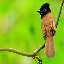

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[154., 207.,  11.],
        [149., 207.,   8.],
        [145., 205.,   9.],
        ...,
        [128., 158.,  36.],
        [131., 151.,  38.],
        [ 74.,  92.,   6.]],

       [[149., 210.,  10.],
        [145., 206.,   6.],
        [141., 208.,   7.],
        ...,
        [145., 169.,  59.],
        [129., 148.,  40.],
        [ 60.,  73.,   4.]],

       [[147., 208.,   8.],
        [141., 208.,   6.],
        [137., 205.,   4.],
        ...,
        [174., 183.,  92.],
        [130., 143.,  51.],
        [ 47.,  55.,   0.]],

       ...,

       [[137., 197.,   3.],
        [135., 189.,   3.],
        [131., 186.,   5.],
        ...,
        [120., 216.,   5.],
        [123., 217.,   6.],
        [123., 217.,   6.]],

       [[140., 197.,   4.],
        [133., 189.,   4.],
        [129., 189.,   6.],
        ...,
        [121., 215.,   5.],
        [122., 216.,   5.],
        [127., 215.,   6.]],

       [[143., 199.,   4.],
        [134., 194.,   8.],
        [129., 1

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
y=model.predict(x)
pred=np.argmax(y, axis=1)

1/1 [==============================] - 0s 27ms/step


In [ ]:
y

array([[0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
pred

array([4])

In [ ]:
x_train.class_indices

{'non peacock img': 0, 'peacock img': 1}